# 📌 Building a Neural Network from Scratch using only Numpy
In this laboratory lecture, we will create a fully functional neural network from scratch without using libraries specifically designed for Machine Learning/Deep Learning.
We will only use numpy!<br>
We are going to use the MNIST dataset: a classic problem in computer vision, commonly used as a benchmark for evaluating machine learning algorithms.
It consists of ~60,000 labeled images of handwritten digits, ranging from 0-9, each represented by a 28x28 pixel grayscale image.<br>
Here's an example from this dataset:

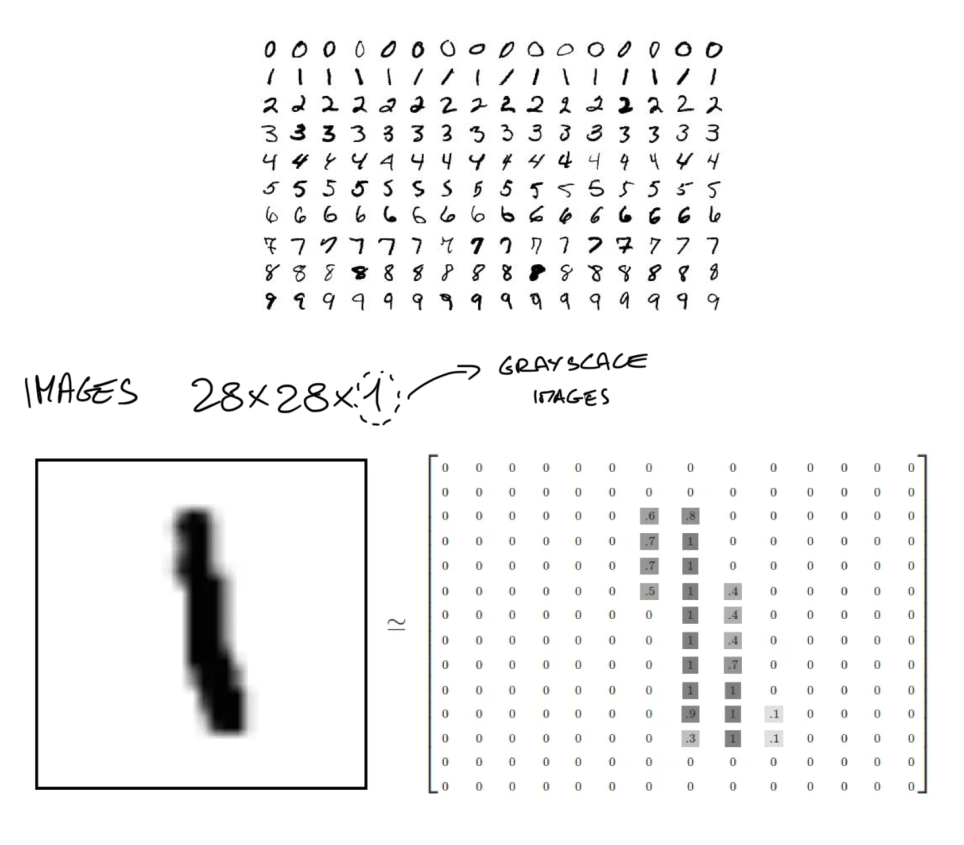


This dataset can be found at `dataset/train.csv` and loaded using the `read_csv` function of the Pandas library. We will proceed to preprocess the
dataset in order to later use it during the training phase of our neural network.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os
import zipfile

### Colab data loading

In [ ]:
# list file in the drive folder
directory = '/content/'
files = os.listdir(directory)
files

In [ ]:
# unzip compressed dataset
with zipfile.ZipFile(directory + 'train.csv.zip', 'r') as zip:
    zip.extractall('/content/')

In [ ]:
# load dataset
data = pd.read_csv('/content/train.csv')

### Data loading on your personal pc

In [ ]:
# list file in the dataset folder
directory = 'dataset/'
files = os.listdir(directory)
files

['train.csv.zip', 'train.csv']

In [ ]:
# unzip compressed dataset
with zipfile.ZipFile(directory + 'train.csv.zip', 'r') as zip:
    zip.extractall('dataset/')

In [ ]:
# load dataset
data = pd.read_csv('dataset/train.csv')

### Data preprocessing

In [ ]:
# print some dataset's lines
display(data.head())
print(data.shape)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)


<!-- Prima di poter utilizzare i dati vanno processati ed adattati per rendere il lavoro più semplice alla Rete Nurale.
Per prima cosa dobbiamo andare a effettuare un'operazione di shaffle dei dati per non andare ad introdurre possibili bias dovuti all'ordine delle immagini.
Poi dobbiamo suddividere i dati in training set e testing set, normalizzarli ed infine dargli la giusta forma per poter essere passati alla rete.

È importante notare che i dati che abbiamo appena caricato si presentato sotto forma di matrice dalla forma $m \times 784$ dove la prima colonna rappresenta le relative labels dell'immagine. Ogni riga quindi rappresenta un immagine o sample.<br>
Da questa, dobbiamo riuscire ad estrarre le labels e convertire le immagini in vettori colonna.
Per farlo possiamo _trasporre_ la nostra matrice trasformandola in una nuova matrice $784 \times m$. Ora avremmo che ogni colonna sarà un sample e nella prima riga avremmo tutte le labels. -->

Before using the data, they must be processed and adapted to make the work easier for the Neural Network.
First, we need to perform a shuffle operation on the data to avoid introducing possible biases due to image order.
Then, we need to split the data into training set and testing set, normalize it, and finally give it the appropriate shape to be passed to the network.

It is important to note that the data we just loaded appeared in the form of a matrix with the shape $m \times 784$ where the first column represents the
corresponding labels for the image. Each row therefore represents an image or sample. <br>
From this, we need to extract the labels and convert the images into vectors.
To do this, we can _transpose_ our matrix, transforming it into a new matrix $784 \times m$. Now each column will be a sample, and in the first row we will have all the labels.

<!-- $$
\begin{pmatrix}
    \textcolor{red}{L}   & \textcolor{red}{P_0} & \textcolor{red}{P_1} & \textcolor{red}{P_2} & \textcolor{red}{\cdots}\\
    1   & 0.0 & 0.0 & 0.0 & \cdots\\
    4   & 0.1 & 0.0 & 0.4 & \cdots\\
    7   & 0.8 & 0.0 & 0.0 & \cdots \\
    10  & 0.0 & 0.0 & 0.6 & \cdots
\end{pmatrix}_{m \times 784}
\rightarrow T \rightarrow \ \

\begin{pmatrix}
    \textcolor{red}{L}   & 1   & 4   & 7   & 10\\
    \textcolor{red}{P_0} & 0.0 & 0.1 & 0.8 & 0.0\\
    \textcolor{red}{P_1} & 0.0 & 0.0 & 0.0 & 0.0\\
    \textcolor{red}{P_2} & 0.0 & 0.4 & 0.0 & 0.6\\
    \textcolor{red}{\vdots} & \vdots &\vdots &\vdots&\vdots
\end{pmatrix}_{784 \times m}


$$ -->

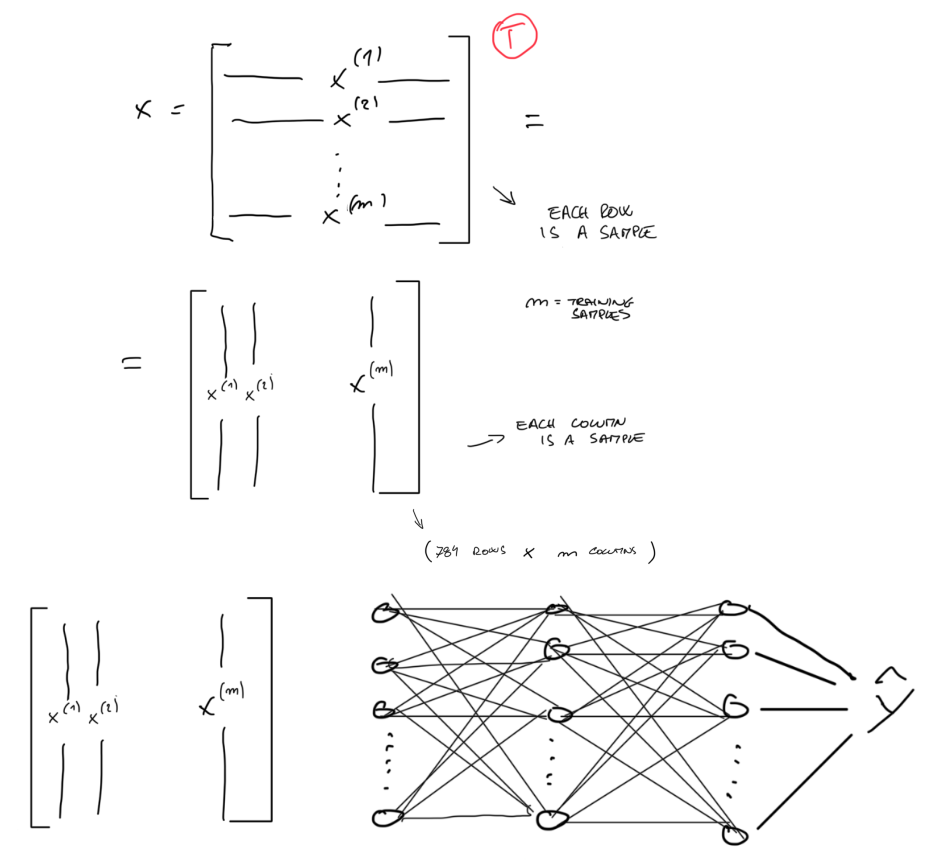

To summarize, we are goning to do the folloing actions:

1. Random Shuffle
2. 1000 Images as Testing Set, the others images are for the Training set
3. For each set
    - transpose the data matrix,
    - assign the labels to a variable
    - assign the images' pixel values to a variable
    - normalize the images

In [ ]:
# Train/Test split and data Normalization
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_train = data[1000:].T  # Transpose because 1 row will be labels !
Y_train = data_train[0]     # Get first row: Labels
X_train = data_train[1:]    # Get the rest of the rows
X_train = X_train / 255.    # Normalization
#display(X_train)
#display(Y_train)

data_test = data[:1000].T
Y_test = data_test[0]
X_test = data_test[1:]
X_test = X_test / 255.

#display(X_test)
#display(Y_test)

In [ ]:
print(X_train.shape)
print(X_train[:, 0].shape) # first image (first Column)

(784, 41000)
(784,)


Plot an example image

Label: 7


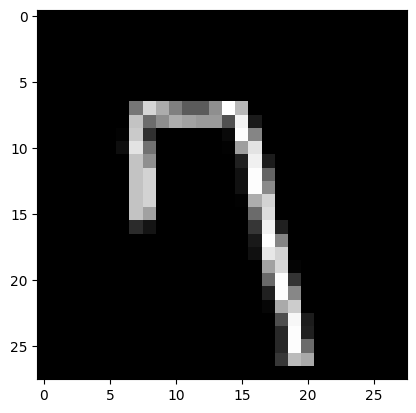

In [ ]:
_idx = 20
_pltimg = X_train[:, _idx].reshape((28,28))
_pltlabel = Y_train[_idx]

print(f"Label: {_pltlabel}")
plt.gray()
plt.imshow(_pltimg)
plt.show()

Visualize a grid of images

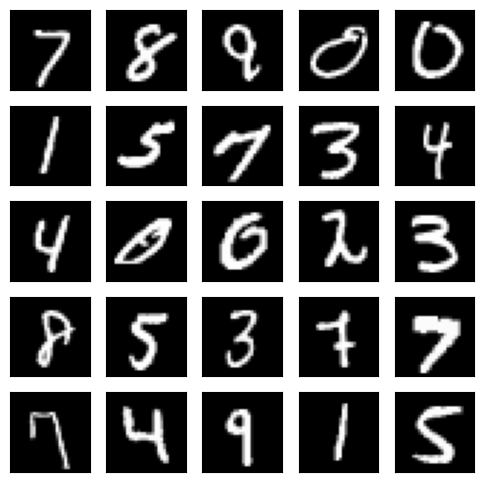

In [ ]:
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[:,i].reshape((28, 28)))

### Neural Network Architecture
Our NN will have a simple two-layer architecture:
-  Input layer $A^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28x1 input image;
- A hidden layer $A^{[1]}$ will have 10 units with ReLU activation;
- the output layer $A^{[2]}$ will have 10 units corresponding to the 10-digit classes with softmax activation.


In order to have a NN with good accuracy performance in prediction we have to implement 3 main phases that will compose the training algorithm:
- **Forward propagation**
- **Backward propagation**
- **Parameter updates**

### Utilities Function

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)


def ReLU_derivative(Z):
    return Z > 0


def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

### Training Phase

**Forward propagation**

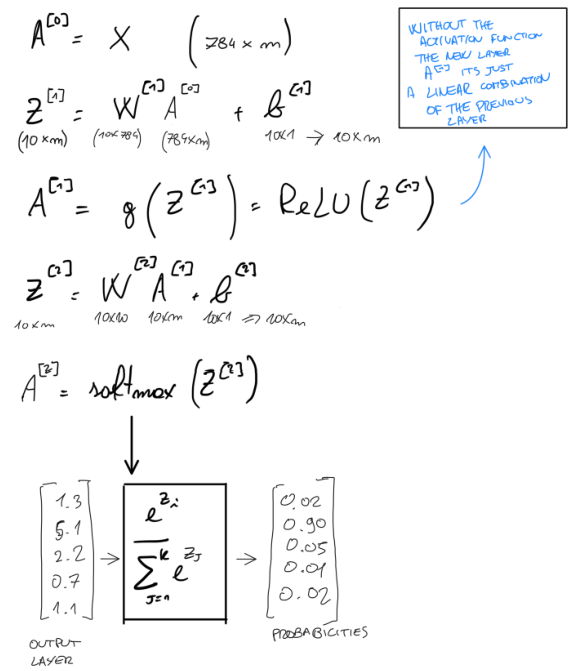


**Backward propagation**

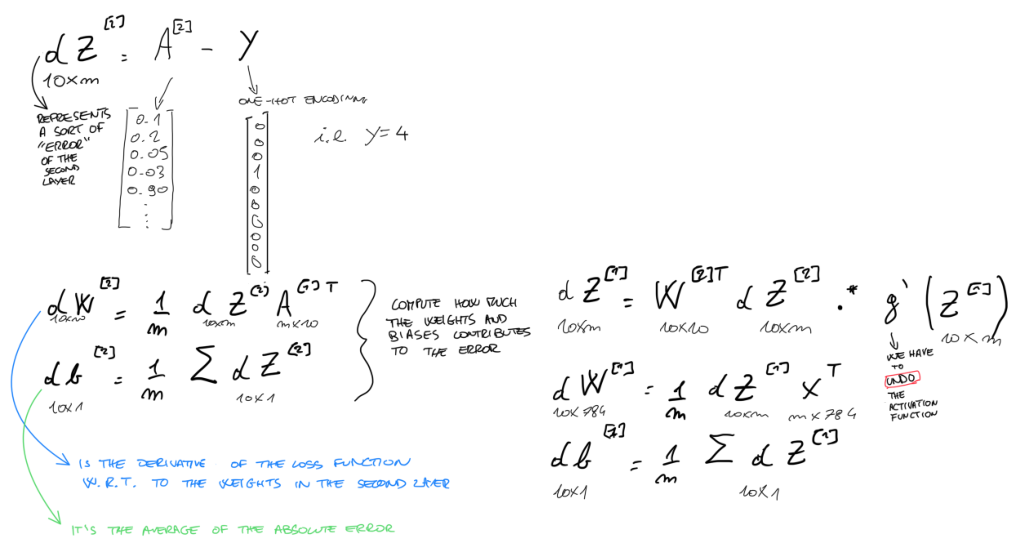



**Parameter updates**

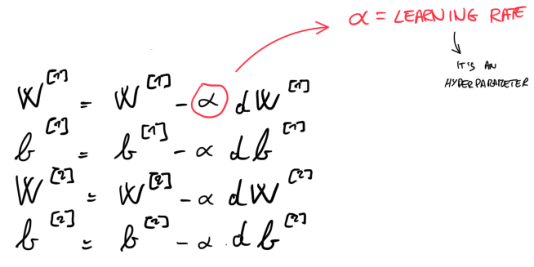


In [ ]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(2./784)
    b1 = np.random.normal(size=(10, 1))   * np.sqrt(2./10)
    W2 = np.random.normal(size=(10, 10))  * np.sqrt(2./10)
    b2 = np.random.normal(size=(10, 1))   * np.sqrt(2./10)
    return W1, b1, W2, b2

In [ ]:
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1).reshape(-1, 1)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1).reshape(-1, 1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(f'Accuracy: {get_accuracy(predictions, Y)*100}%')

    return W1, b1, W2, b2


## Build the NN and make prediction

In [ ]:
# The NN is the combination of all the parameters
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 200)

NN = (W1, b1, W2, b2)

Iteration:  0
Accuracy: 9.578048780487805%
Iteration:  10
Accuracy: 39.2609756097561%
Iteration:  20
Accuracy: 59.77560975609756%
Iteration:  30
Accuracy: 76.22682926829269%
Iteration:  40
Accuracy: 80.11707317073171%
Iteration:  50
Accuracy: 82.38780487804877%
Iteration:  60
Accuracy: 83.95365853658537%
Iteration:  70
Accuracy: 85.10975609756098%
Iteration:  80
Accuracy: 85.97073170731707%
Iteration:  90
Accuracy: 86.63170731707316%
Iteration:  100
Accuracy: 87.16585365853659%
Iteration:  110
Accuracy: 87.55853658536586%
Iteration:  120
Accuracy: 87.9560975609756%
Iteration:  130
Accuracy: 88.26341463414634%
Iteration:  140
Accuracy: 88.54634146341463%
Iteration:  150
Accuracy: 88.76585365853659%
Iteration:  160
Accuracy: 88.96829268292683%
Iteration:  170
Accuracy: 89.10975609756098%
Iteration:  180
Accuracy: 89.2390243902439%
Iteration:  190
Accuracy: 89.3658536585366%


### Make some predictions

In [ ]:
def make_predictions(X, NN):
    _, _, _, A2 = forward_propagation(NN[0], NN[1], NN[2], NN[3], X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, NN):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], NN)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image)
    plt.show()

Prediction:  [7]
Label:  7


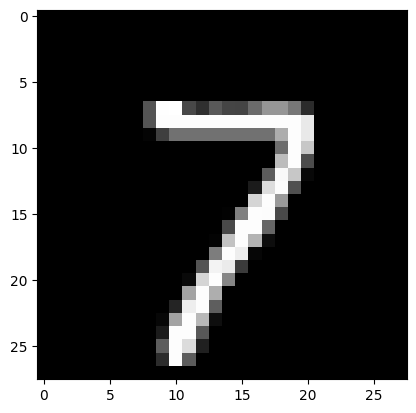

Prediction:  [8]
Label:  8


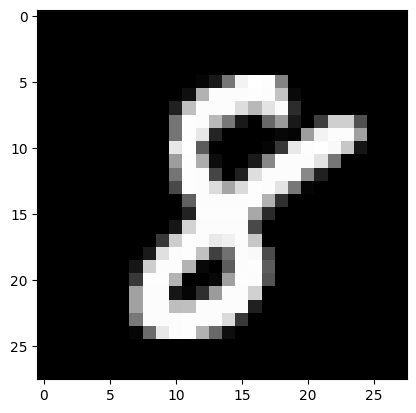

Prediction:  [9]
Label:  9


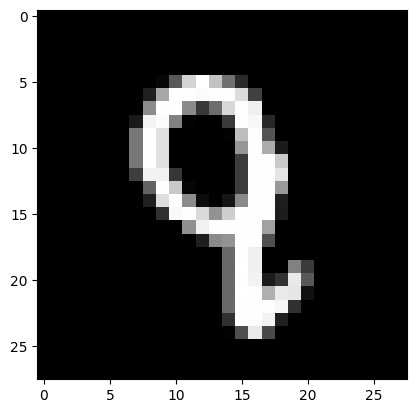

Prediction:  [0]
Label:  0


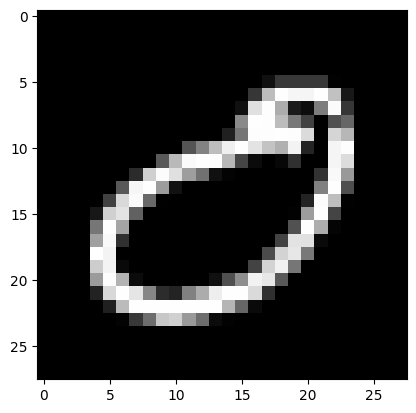

In [ ]:
test_prediction(0, NN)
test_prediction(1, NN)
test_prediction(2, NN)
test_prediction(3, NN)

### Accuracy on Test set

In [ ]:
dev_predictions = make_predictions(X_test, NN)
print(f"Accuracy on test set {get_accuracy(dev_predictions, Y_test) * 100}%")

Accuracy on test set 89.3%
